# Lasso Reggression
Lasso stands for "$least$ $absolute$ $shrinkage$ and $selection$ $operator$" is a penalized regression analysis method that performs both $variable$ $selection$ and $shrinkage$ in order to enhance the prediction accuracy. Suppose we have many features and we want to know which are the most useful features in predicting target in that case lasso can help us. Features that are not helping in decision making lasso will set their coefficients value very low potentially zero. It adds them one at time, if new feature would not improve model then it sets its coefficient to zero.

## The General Regression Equation-> 
$$
Y= C0X0 + C1X1 + C2X2 + C3X3 + C4X4 +……..+ E
$$
$E$ is called a $statistical$ $error$. It accounts for the fact that the statistical model does not give an exact fit to the data. The model having lowest E value is best fit model to data set.

### Shrinkage. 
$Lasso$ is a $penalized$ $method$.<br>
By penalizing we end up with a situation where some of the parameters coefficient estimates may be exactly zero. The larger the penalty applied, the more variables  are shrunk towards zero.
$$
Y= C0X0 + C1X1 + 0X2 + C3X3 + 0X4+…………+ E
$$
$Variable$ $selection$. Refer to process of selecting subset of explanatory variables. Lasso will make non useful variable’s coefficient 0 that automatically removes that variable.

## Theory:
### How does Lasso works:
As we know lasso is penalized method.For penalizing (shrinking coefficient) Lasso performs L1 regularization .

$Regularization$, refers to a process of introducing additional information in order to prevent overfitting and in L1 regularization it adds a factor of $sum$ $of$ $absolute$ $value$ $of$ $coefficients$. To fit the best model lasso try to minimize the residual sum of square with penalty L1 regularization.
$$
\hat  \beta =argmin  ||y-X \hat  \beta||^2_2+^ || \hat  \beta ||_1
$$
$$
 \hat  \beta ∈R^p
$$

The tuning parameter lambda controls the strength of penalty. Lambda is set by cross validation solution where having lowest bias and variance. As bias increase when lamba increases and variance decreases when lambda increases. Lasso will select optimal point where having lowest bias variance

lambda = 0 :  Same coefficients as simple linear regression <br>
lambda= infinity: All coefficients set to zero


# Joint feature selection with multi-task Lasso


The multi-task lasso allows to fit multiple regression problems
jointly enforcing the selected features to be the same across
tasks. This example simulates sequential measurements, each task
is a time instant, and the relevant features vary in amplitude
over time while being the same. The multi-task lasso imposes that
features that are selected at one time point are select for all time
point. This makes feature selection by the Lasso more stable.




In [1]:
%matplotlib inline

 sets the backend of matplotlib to the 'inline' backend:

With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

## Importing requried libraries
 The purpose of a plotting package is to assist you in visualizing your data as easily as possible, with all the necessary control 
 that is, by using relatively high-level commands most of the time, and still have the ability to use the low-level commands when needed.

In [2]:
import matplotlib.pyplot as plt #explaining matplotlib as pit

**NumPy** is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.<br>
**Sklearn**The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn

In [3]:
import numpy as np #explainig numpy as np

from sklearn.linear_model import MultiTaskLasso, Lasso

## Generate some 2D coefficients with sine waves with random frequency and phase

In [4]:
rng = np.random.RandomState(42) #exposes a number of methods for generating random numbers drawn from a variety of probability distributions

n_samples, n_features, n_tasks = 100, 30, 40 #initializing samples features tasks
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))  #Return a new array of given shape and type, with zeros.
times = np.linspace(0, 2 * np.pi, n_tasks) #Returns number spaces evenly w.r.t interval
for k in range(n_relevant_features): #implementing for loop
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1)) #adding up value and  applying sine function

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks) #finding the dot product product of X with the transpose of coef

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T]) #forming an array
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X, Y).coef_


## Plot support and time series


Text(0.5,0.98,'Coefficient non-zero location')

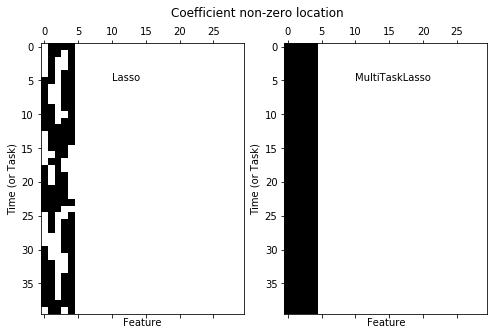

In [5]:
fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')#label on X axis
plt.ylabel('Time (or Task)')#label on Y axis
plt.text(10, 5, 'Lasso')
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature') #plotting X label
plt.ylabel('Time (or Task)') #plotting Y label
plt.text(10, 5, 'MultiTaskLasso')
fig.suptitle('Coefficient non-zero location')


(-1.1, 1.1)

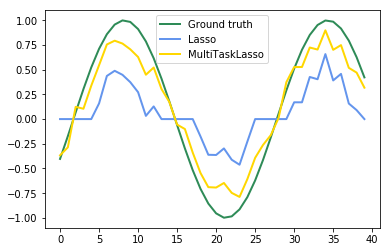

In [7]:
feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
         label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
         label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw,
         label='MultiTaskLasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])